<a href="https://colab.research.google.com/github/YuvarajAnbarasu/Breast-Cancer-Prediction/blob/main/Copy_of_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This dataset contains information about Breast Cancer Patients. It contains information about the tumor and many other variables that were collected when analyzing patients for Breast Cancer.**

Importing necessary libraries

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating different datasets, based on variables that showed highest correlation.

In [413]:
dataset = pd.read_csv("breast-cancer.csv")
df = dataset[['diagnosis', 'smoothness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
                            'smoothness_se', 'compactness_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 'concavity_worst']]


Creating a heatmap using all variables

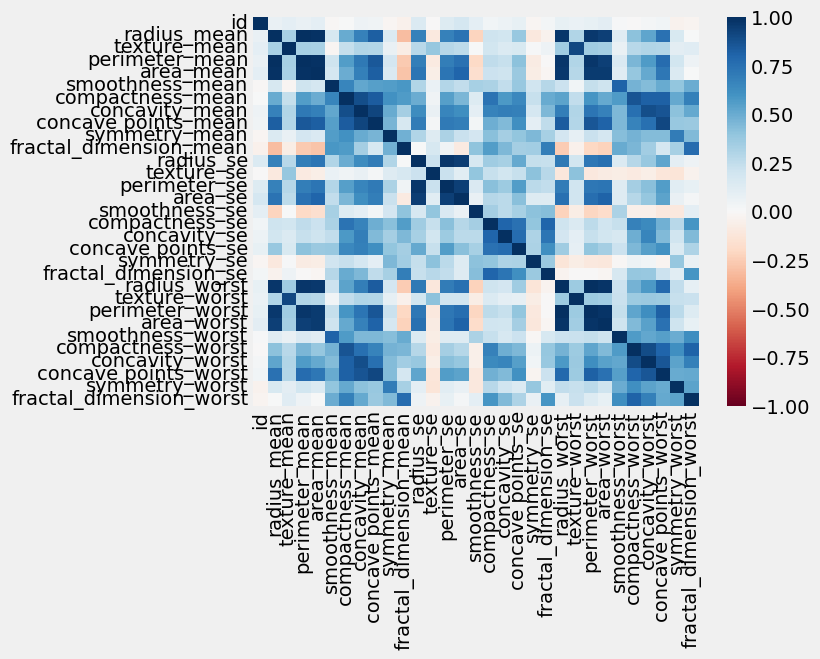

In [414]:
corr = dataset.corr()
# corr.style.background_gradient()
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1,
            cmap="RdBu")

Creating a Heatmap for variables with most correlation using Matplotlib

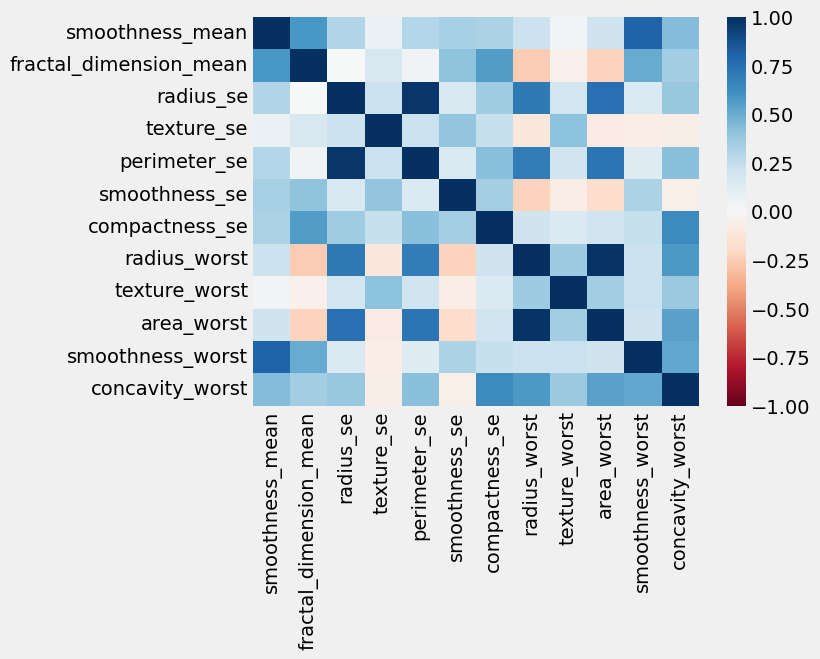

In [415]:
new_corr = df.corr()
# corr.style.background_gradient()
_ = sns.heatmap(new_corr, xticklabels=new_corr.columns, yticklabels=new_corr.columns, vmin=-1, vmax=1,
            cmap="RdBu")

Assigning Input and Output columns, based on variables that contained most correlation,

In [416]:
# input
x = dataset.iloc[:, [ 6, 11, 12, 13, 14, 16, 17, 22, 23, 25, 26, 28]].values

# output
y = dataset.iloc[:, 1].values


Splitting the dataset to train and test. 75% of data is used for training the model and 25% of it is used to test the performance of our model.

In [417]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, test_size=0.25, random_state=0)


Scaling Data to provide accuracte results

In [418]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])


[[-0.91381897 -0.79877182 -0.68958948  0.04723809 -0.78036299  0.21546423
  -0.59450332 -0.6661438   0.01849243 -0.63150142  0.19196229 -0.69592933]
 [ 0.65281216 -0.34145374 -0.37372313  1.38156616 -0.42829675  2.09091025
  -0.82810471 -0.88704517  0.02344492 -0.77100112  0.43210093 -1.29277423]
 [ 0.10362413 -1.06468841  1.25755573  2.29250167  1.14701755 -0.43129014
  -0.05002332  1.50809835  2.08203333  1.43999216 -0.69436757  0.26255563]
 [-1.22020808 -1.08368245 -0.51178392 -0.08472842 -0.56232473 -1.14959128
  -1.16824249 -0.16707034  0.07627157 -0.25363996 -1.20084178 -0.82514057]
 [-1.54610782 -1.36859307 -0.54908822 -1.18096691 -0.51764874 -1.52999336
  -0.62635805  0.58563061  0.15220988  0.33526388 -1.37985422 -0.10993615]
 [-0.90370234 -0.31223214 -0.56407967 -0.11038858 -0.6225402   0.0684746
  -0.83282393 -0.54751158  0.23475151 -0.5550071  -0.15733026 -1.1327239 ]
 [-0.64572849 -0.55331036 -0.52468354  0.27634662 -0.53610186 -0.47768928
  -1.01103347 -0.24684028 -0.0095

Training the model using Logistic Regression

In [419]:

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

Using classifier test on trained model.

In [420]:
y_pred = classifier.predict(xtest)


Using Confusion matrix to test the accuracy of the model.

In [421]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[90  0]
 [ 1 52]]


Obtained accuracy of 99% from model

In [422]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))


Accuracy :  0.993006993006993
